## Домашнее задание 1 (5 баллов)

Все задания ниже имеют равный вес (5/10).

### О задании

В этом домашнем задании вы попрактикуетесь в работе с библиотекой numpy, которая позволяет сравнительно легко и удобно выполнять разнообразные вычисления, избегая самостоятельной реализации поэлементной обработки.

Во всех задачах необходимо написать код решения внутри функции и убедиться, что она работает, с помощью [assert](https://python-reference.readthedocs.io/en/latest/docs/statements/assert.html) на выражение с использованием этой функции для данных из условия.

При решении задач запрещается использовать циклы (`for`, `while`) и оператор `if`.

Везде, где встречаются массивы или матрицы, подразумевается, что это `numpy.array`.

**numpy reference:** https://numpy.org/doc/stable/reference/index.html

In [ ]:
import numpy as np

### Задание 1

Напишите функцию, возвращающую округленную взвешенную сумму оценок по данным оценкам и весам. Можете посчитать свою оценку за курс :) В нашем случае вес экзамена равен 0.3, вес домашек - 0.4, вес контрольной - 0.2, вес самостоятельных - 0.1. Например, если за экзамен у вас 7, за домашки 10, за контрольную 8, а за самостоятельные 6, то вы получите отличную оценку 8!

In [ ]:
import numpy as np
def result_mark(weights: np.array, marks: np.array) -> int:
    result = np.sum(weights * marks)
    itog = np.where(result==(int(result)+0.5), int(result)+1, round(result))
    return itog
# сначала умножаем оценки на веса, потом суммируем и округляем до ближайшего целого
# если число с половиной, то раунд не совсем корректно может работать, поэтому применим хитрый трюк и сравним result с int(result)+1

In [ ]:
weights = np.array([0.3, 0.4, 0.2, 0.1])
marks = np.array([7, 10, 8, 6])

assert result_mark(weights, marks) == 8

In [ ]:
weights = np.array([0.3, 0.4, 0.2, 0.1])
marks = np.array([7, 0, 8, 6])

assert result_mark(weights, marks) == 4

In [ ]:
# вот здесь как раз этот прикол с половинчатой оценкой
weights = np.array([0.3, 0.4, 0.2, 0.1])
marks = np.array([7, 0, 8, 8])

# оценка равна 4.5. Round в таких случая округлил бы до ближайшего четного целого, то есть до 4. У нас же это будет 5

assert result_mark(weights, marks) == 5

In [ ]:
# А тут оценка равна 5.5
weights = np.array([0.3, 0.4, 0.2, 0.1])
marks = np.array([8, 1, 9, 9])

# по итогу надо будет перевести в 6, ну 6 так 6
assert result_mark(weights, marks) == 6

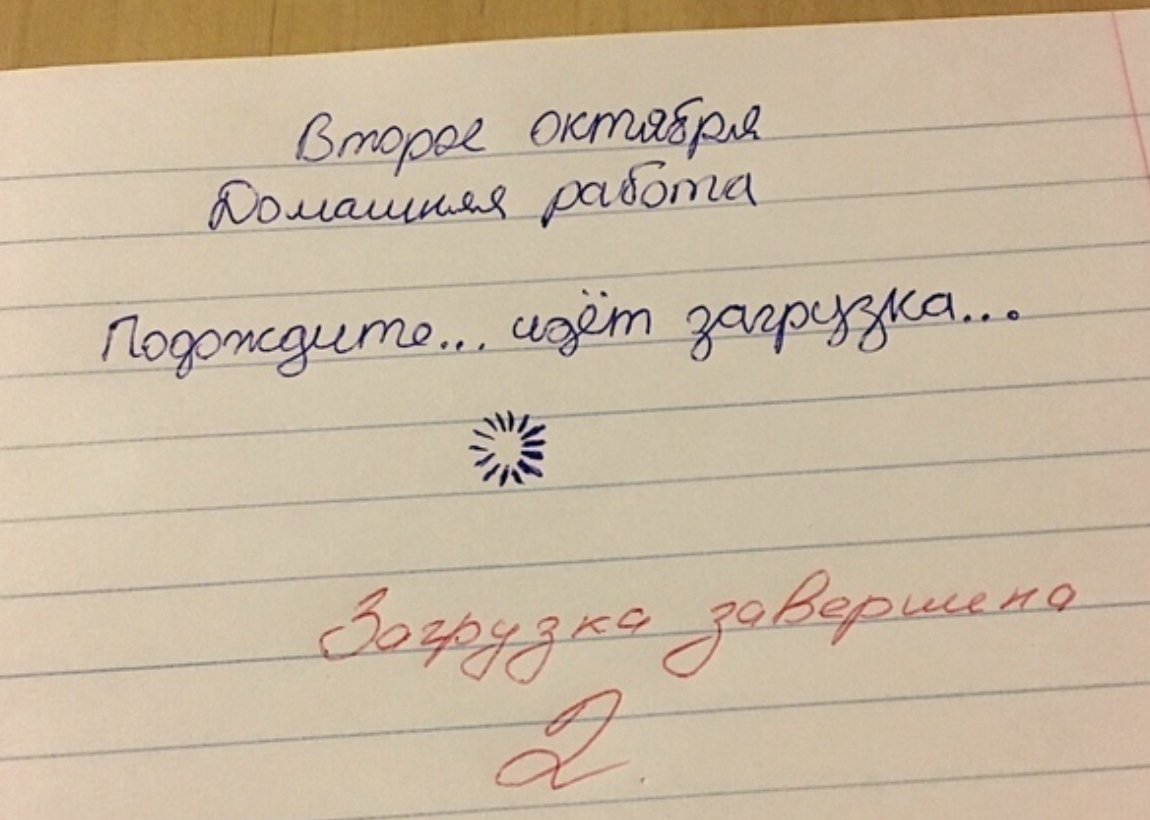

In [ ]:
Image('waitpls.png', width=600)

### Задание 2

Напишите функцию, меняющую каждое третье (начиная с 0) значение массива целых чисел на заданное число. Например, если на вход поступает массив `array([3, 5, 1, 0, -3, 22, 213436])` и число `-111`, то на выходе должен получиться массив `array([-111, 5, 1, -111, -3, 22, -111])`.

In [ ]:
import numpy as np
def change_array(array: np.array, number: int) -> np.array:
  array[::3] = number
  return array
# заменяем каждое претье число на number, начиная синдекс индекс 0

In [ ]:
array = np.array([3, 5, 1, 0, -3, 22, 213436])
number = -111

assert np.allclose(change_array(array, number), np.array([-111, 5, 1, -111, -3, 22, -111]))

In [ ]:
array = np.array([3, 14, 15, 92, 6])
number = 8

assert np.allclose(change_array(array, number), np.array([8, 14, 15, 8, 6]))

### Задание 3

Напишите функцию, выдающую индексы «близких» элементов заданных массивов, а именно тех пар элементов, чей модуль разницы не превосходит заданного значения. Например, если на вход поступают массив `array([1.5, 0.5, 2, -4.1, -3, 6, -1])`, массив `array([1.2, 0.5, 1, -4, 3, 0, -1.2])` и число `0.5`, то на выходе должен получиться массив `array([0, 1, 3, 6])` (**важно: не `tuple`, а одномерный массив типа `numpy.ndarray` (то есть `.ndim` от него равно 1)!**).

In [ ]:
import numpy as np
def find_close(array1: np.array, array2: np.array,
               precision: float) -> np.array:
               res = np.where(abs(array1 - array2)<=precision)[0]
               return res
# ищу модуль разницы пары чисел из двух массивов и сравниваю его с поданным на ввод значением precision
# np.where здесь будет возвращать индексы элементов, если условие выполнено
# если правда (модуль разницы меньше precision), то закидывается в кортеж res
# вытаскиваю из кортежа индекс 0, чтобы вывести массив

In [ ]:
array1 = np.array([1.5, 0.5, 2, -4.1, -3, 6, -1])
array2 = np.array([1.2, 0.5, 1, -4.0,  3, 0, -1.2])
precision = 0.5
res = find_close(array1, array2, precision)

assert res.ndim == 1
assert np.allclose(res, np.array([0, 1, 3, 6]))

In [ ]:
array1 = np.array([3.1415, 2.7182, 1.6180, 6.6261])
array2 = np.array([6.6730, 1.3807, -1,     6.0222])
precision = 1.7
res = find_close(array1, array2, precision)

assert res.ndim == 1
assert np.allclose(res, np.array([1, 3]))

### Задание 4

:Напишите функцию, которая составляет блочную матрицу из четырех блоков, где каждый блок - это заданная матрица. Например, если на вход поступает матрица
$$
\begin{pmatrix}
0 & 1 & 2\\
3 & 4 & 5\\
\end{pmatrix},
$$
то ответом будет матрица
$$
\begin{pmatrix}
0 & 1 & 2 & 0 & 1 & 2\\
3 & 4 & 5 & 3 & 4 & 5\\
0 & 1 & 2 & 0 & 1 & 2\\
3 & 4 & 5 & 3 & 4 & 5\\
\end{pmatrix}
$$



https://numpy.org/doc/stable/reference/generated/numpy.tile.html


In [ ]:
import numpy as np
def block_matrix(block: np.array) -> np.array:
  block = np.tile(block,(2,2))
  return block
#  с помощью функции tile раздвоена матрица повторена 2 раза в строку и 2 раза в столбец

In [ ]:
block = np.array([[1, 3, 3], [7, 0, 0]])

assert np.allclose(
    block_matrix(block),
    np.array([[1, 3, 3, 1, 3, 3],
              [7, 0, 0, 7, 0, 0],
              [1, 3, 3, 1, 3, 3],
              [7, 0, 0, 7, 0, 0]])
)

### Задание 5

Напишите функцию, вычисляющую произведение всех ненулевых диагональных элементов на диагонали данной квадратной матрицы. Например, если на вход поступает матрица
$$
\begin{pmatrix}
0 & 1 & 2\\
3 & 4 & 5\\
6 & 7 & 8\\
\end{pmatrix},
$$
то ответом будет 32.

Элементы матрицы считать целочисленными.

In [ ]:
import numpy as np
def diag_prod(matrix: np.array) -> int:
  diag= np.setdiff1d(np.diag(matrix),0)
  diag = np.prod(diag)
  return diag

  # убираем нули из diag с помощью setdiff1d, потом перемножаем ненулевые элементы

In [ ]:
matrix = np.array([[0, 1, 2, 3],
                   [4, 5, 6, 7],
                   [8, 9, 10, 11],
                   [12, 13, 14, 15]])

assert diag_prod(matrix) == 750

In [ ]:
matrix = np.array([[0, 1, 2],
                   [4, 0, 6],
                   [8, 9, 15]])

assert diag_prod(matrix) == 15

Примечание:

***Предполагается, что на главной диагонали стоит хотя бы одно число отличное от нуля. Так как мы изначально убираем все 0 из массива, то если все элементы на главной диагонали будут = 0, то массив будет пустым. И по сути с ним не сделаешь уже ничего в этой задаче***

### Задание 6

Для улучшения качества работы некоторых алгоритмов машинного обучения может быть полезно использовать [нормализацию данных](https://vk.cc/8xmfQk), чтобы привести признаки в выборке к одному масштабу — а именно, из каждого столбца вычесть среднее его значений и поделить на их стандартное отклонение. Напишите функцию, нормализующую входящую матрицу (по столбцам). Например, если на вход подается матрица
$$
\begin{pmatrix}
1 & 4 & 4200\\
0 & 10 & 5000\\
1 & 2 & 1000\\
\end{pmatrix},
$$
то результатом с точностью до сотых будет матрица
$$
\begin{pmatrix}
0.71 & -0.39 & 0.46\\
-1.41 & 1.37 & 0.93\\
0.71 & -0.98 & -1.39\\
\end{pmatrix}
$$

Учтите, что в вашем матрице не должно получаться никаких nan. Подумайте, в каком случае они могут возникнуть и как обойти эту проблему.

_Подсказка. Казалось бы, при чем тут деление на ноль._

In [ ]:
import numpy as np
def normalize(matrix: np.array) -> np.array:
  means = np.mean(matrix, axis=0)
  d = np.std(matrix, axis = 0)
  return (matrix - means)/(d+10**(-6)*(d==0))

  #ищем среднее means и станд отклонение d, возвращаем (matrix - means)/d
  #на случай когда d = 0, добавим 10**6 (вот эта часть (d==0)), чтобы на ноль не делить ;/

In [ ]:
matrix = np.array([[1, 4, 4200], [0, 10, 5000], [1, 2, 1000]])

assert np.allclose(
    normalize(matrix),
    np.array([[ 0.7071, -0.39223,  0.46291],
              [-1.4142,  1.37281,  0.92582],
              [ 0.7071, -0.98058, -1.38873]])
)

In [ ]:
matrix = np.array([[-7, 2, 42], [2, 10, 50], [5, 4, 10]])

assert np.allclose(
    normalize(matrix),
    np.array([[-1.37281, -0.98058,  0.46291],
              [ 0.39223,  1.37281,  0.92582],
              [ 0.98058, -0.39223, -1.38873]])
)

In [ ]:
# В столбце с индексом[0] d = 0

matrix = np.array([[5, 2, 42], [5, 10, 50], [5, 4, 10]])
normalize(matrix)

assert np.allclose(
    normalize(matrix),
    np.array([[ 0.        , -0.98058068,  0.46291005],
       [ 0.        ,  1.37281295,  0.9258201 ],
       [ 0.        , -0.39223227, -1.38873015]])

)

### Задание 7

Написать функцию, возвращающую максимальный элемент в векторе x среди элементов, перед которыми стоит нулевой. <br>
Для x = np.array([6, 2, 0, 3, 0, 0, 5, 7, 0]) ответом является 5.

In [ ]:
import numpy as np
def prevZeroMax(matrix: np.array) -> int:
  indexes = (np.where(matrix == 0)[0]+1)
  indexes = indexes[indexes<=(len(matrix)-1)]
  return max(matrix[indexes])

# ищем индексы нулевых элементов, добавляем к ним 1, чтобы найти следующий, заносим все дело с indexes
# так уже может сложиться, что последний элемент мб нулевый и тогда индекс следующего за ним числа
# окажется в массиве indexes (но у нас нет этого числа, 0 - последний элемент). Просто уберем этого самозванца, отсортировав indexes
# по len(matrix)-1) - это как раз и будет кол-во индексов в исходном массиве

# урааа дальше просто возвращаем максимум из отсортированного indexes

In [ ]:
coefs = np.array([6, 2, 0, 3, 0, 0, 5, 7, 0])

assert  prevZeroMax(coefs) == 5

In [ ]:
coefs = np.array([1, 0, 1, 0, 4, 2, 0])

assert prevZeroMax(coefs) == 4


In [ ]:
coefs = np.array([1, 1, 1, 0, 0, 2])

assert prevZeroMax(coefs) == 2

Второй вариант как это может работать

In [ ]:
def prevZeroMax2(matrix: np.array) -> int:
  mask = matrix == 0
  mask = np.concatenate((np.array([False]), mask))
  matrix = np.append(matrix, 0)
  return max(matrix[mask])

prevZeroMax2(matrix = np.array([1, 0, 1, 0, 4, 2, 0])
)

# это заметочка просто, суть работы такая же в целом

4

### Задание 8

Напишите функцию, делающую данную треугольную матрицу симметричной. Например, если на вход поступает матрица
$$
\begin{pmatrix}
1 & 2 & 3 & 4\\
0 & 5 & 6 & 7\\
0 & 0 & 8 & 9\\
0 & 0 & 0 & 10\\
\end{pmatrix},
$$
то на выходе должна быть матрица
$$
\begin{pmatrix}
1 & 2 & 3 & 4\\
2 & 5 & 6 & 7\\
3 & 6 & 8 & 9\\
4 & 7 & 9 & 10\\
\end{pmatrix}.
$$

In [ ]:
import numpy as np
def make_symmetric(matrix: np.array) -> np.array:
  return matrix.T + matrix - np.diag(np.diag(matrix))
# исходную матрицу складываем с транпонированной и с помощью np.diag(np.diag(matrix)) вычитаем сдвоенную главную диагональ

In [ ]:
# проверка работы np.diag(np.diag(matrix))
# просто вывод главно диагонали ;)

matrix = np.array([[1, 2, 3, 4], [0, 5, 6, 7], [0, 0, 8, 9], [0, 0, 0, 10]])
print(np.diag(np.diag(matrix)))

[[ 1  0  0  0]
 [ 0  5  0  0]
 [ 0  0  8  0]
 [ 0  0  0 10]]


In [ ]:
#верхний треугольник
matrix = np.array([[1, 2, 3, 4], [0, 5, 6, 7], [0, 0, 8, 9], [0, 0, 0, 10]])

assert np.allclose(
    make_symmetric(matrix),
    np.array([[ 1,  2,  3,  4],
              [ 2,  5,  6,  7],
              [ 3,  6,  8,  9],
              [ 4,  7,  9, 10]])
)

In [ ]:
#верхний треугольник
matrix = np.array([[10, 21, 32, 49], [0, 53, 62, 78], [0, 0, 82, 92], [0, 0, 0, 10]])

assert np.allclose(
    make_symmetric(matrix),
    np.array([[10, 21, 32, 49],
              [21, 53, 62, 78],
              [32, 62, 82, 92],
              [49, 78, 92, 10]])
)

In [ ]:
# Если треугольная матрица с левым нижним углом
matrix = np.array([[10, 0, 0], [9, 8, 0], [1, 2, 7]])
assert np.allclose(
    make_symmetric(matrix),
    np.array([[10,  9,  1],
       [ 9,  8,  2],
       [ 1,  2,  7]])
)

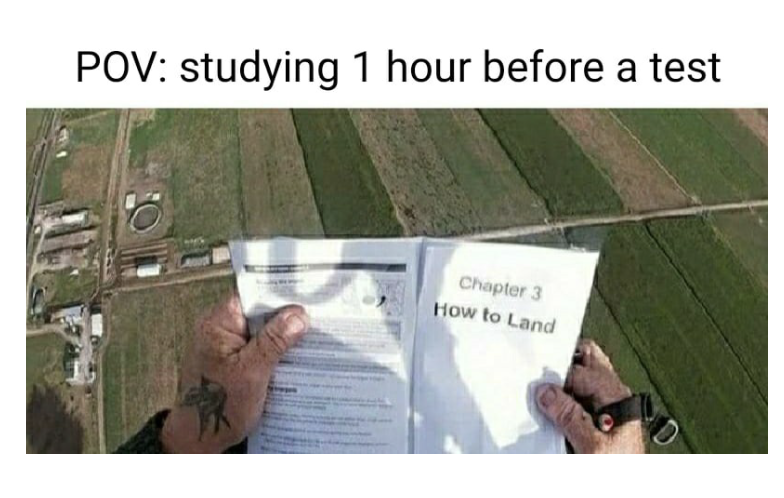

In [ ]:
Image('mem.png', width=600)

### Задание 9

Напишите функцию, создающую прямоугольную матрицу из m одинаковых строк, заполненных последовательными натуральными числами от a до b включительно в возрастающем порядке. Например, если m = 5, a = 3, b = 10, то на выходе будет матрица
$$
\begin{pmatrix}
3 & 4 & 5 & 6 & 7 & 8 & 9 & 10\\
3 & 4 & 5 & 6 & 7 & 8 & 9 & 10\\
3 & 4 & 5 & 6 & 7 & 8 & 9 & 10\\
3 & 4 & 5 & 6 & 7 & 8 & 9 & 10\\
3 & 4 & 5 & 6 & 7 & 8 & 9 & 10\\
\end{pmatrix}
$$

In [ ]:
import numpy as np
def construct_matrix(m: int, a: int, b: int) -> np.array:
  array = np.tile(np.arange(a,b+1), (m,1))
  return array
# просто сгенерировалась матрица по нужным параметрам a, b
# далее с помощью функции tile увеличиваем количество построчных повторов до размера m

In [ ]:
m = 5
a = 3
b = 10

assert np.allclose(
    construct_matrix(m, a, b),
    np.array([[ 3,  4,  5,  6,  7,  8,  9, 10],
              [ 3,  4,  5,  6,  7,  8,  9, 10],
              [ 3,  4,  5,  6,  7,  8,  9, 10],
              [ 3,  4,  5,  6,  7,  8,  9, 10],
              [ 3,  4,  5,  6,  7,  8,  9, 10]])
)

In [ ]:
m = 3
a = 2
b = 6

assert np.allclose(
    construct_matrix(m, a, b),
    np.array([[2, 3, 4, 5, 6],
              [2, 3, 4, 5, 6],
              [2, 3, 4, 5, 6]])
)

### Задание 10

Напишите функцию, вычисляющую [косинусную близость](https://en.wikipedia.org/wiki/Cosine_similarity) двух векторов. Например, если на вход поступают вектора `array([-2, 1, 0, -5, 4, 3, -3])` и `array([0, 2, -2, 10, 6, 0, 0])`, ответом будет -0.25.

In [ ]:
import numpy as np
def cosine_similarity(vec1: np.array, vec2: np.array) -> float:
  return np.dot(vec1, vec2)/(np.sqrt(np.sum(vec1**2))*np.sqrt(np.sum(vec2**2)))
# ну тут все по формуле, несложно: скаляр в числителе, произведение корней из
#  (сумма1(вектор1 возведенный в квадрат)) и (сумма2(вектор2 возведенный в квадрат)) в зна

In [ ]:
vec1 = np.array([-2, 1,  0, -5, 4, 3, -3])
vec2 = np.array([ 0, 2, -2, 10, 6, 0,  0])

assert np.allclose(cosine_similarity(vec1, vec2), -0.25)

In [ ]:
vec1 = np.array([-4, 2,  9, -8, 9, 0, -2])
vec2 = np.array([ 3, 2, -4, -1, 3, 2,  2])

assert np.allclose(cosine_similarity(vec1, vec2), -0.119929)

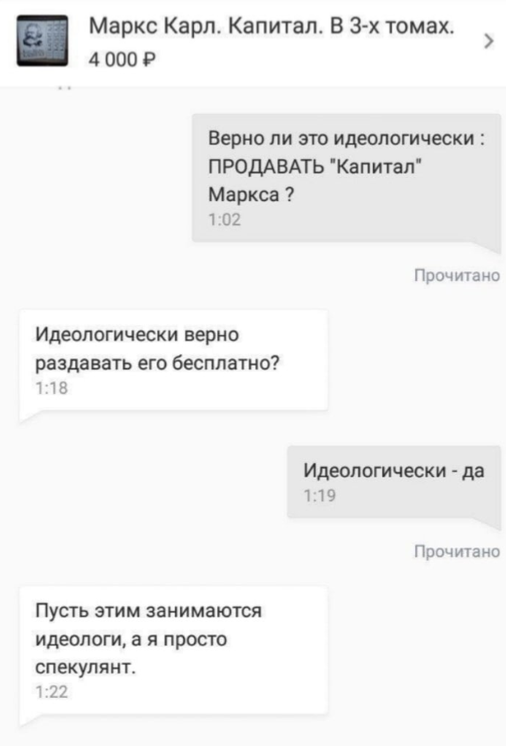

In [ ]:
Image('kapital.png', width=400)